<a href="https://colab.research.google.com/github/Davidgr11/Computational_Intelligence_AI_DataMining/blob/main/DecisionTreesWeather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import pandas
import matplotlib.pyplot as pyplot

In [ ]:
datos=pandas.read_csv('datos tenis.csv')
datos

,ID,Outlook,Temp,Humidity,wind,Play?
0,D1,sunny,hot,high,weak,no
1,D2,sunny,hot,high,strong,no
2,D3,overcast,hot,high,weak,yes
3,D4,rain,mild,high,weak,yes
4,D5,rain,cool,normal,weak,yes
5,D6,rain,cool,normal,strong,no
6,D7,overcast,cool,normal,strong,yes
7,D8,sunny,mild,high,weak,no
8,D9,sunny,cool,normal,weak,yes
9,D10,rain,mild,normal,weak,yes


In [ ]:
datos=datos.iloc[:,1:]
datos

,Outlook,Temp,Humidity,wind,Play?
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [ ]:
#la estructura de lo anterior es [lo que quiero de los renglones, lo que quiero de las columnas]
#si pongo solo : significa que quiero todo, si pongo 1: se refiere a que quiero a partir del lugar 1

X=datos.iloc[:,:4]
X

,Outlook,Temp,Humidity,wind
0,sunny,hot,high,weak
1,sunny,hot,high,strong
2,overcast,hot,high,weak
3,rain,mild,high,weak
4,rain,cool,normal,weak
5,rain,cool,normal,strong
6,overcast,cool,normal,strong
7,sunny,mild,high,weak
8,sunny,cool,normal,weak
9,rain,mild,normal,weak


In [ ]:
# si pongo :4 es que a partir de la cuarta, lo mando a volar
y=datos['Play?']
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play?, dtype: object

In [ ]:
X['Outlook']=X['Outlook'].astype('category')
X['Temp']=X['Temp'].astype('category')
X['Humidity']=X['Humidity'].astype('category')
X['wind']=X['wind'].astype('category')

<ipython-input-16-53a3c77acdfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Outlook']=X['Outlook'].astype('category')
<ipython-input-16-53a3c77acdfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Temp']=X['Temp'].astype('category')
<ipython-input-16-53a3c77acdfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
X['Outlook']

0        sunny
1        sunny
2     overcast
3         rain
4         rain
5         rain
6     overcast
7        sunny
8        sunny
9         rain
10       sunny
11    overcast
12    overcast
13        rain
Name: Outlook, dtype: category
Categories (3, object): ['overcast', 'rain', 'sunny']

In [ ]:
arbol=xgboost.XGBClassifier(n_estimators=10,tree_method='hist',enable_categorical=True)

In [ ]:
y.loc[y=='no']=0
y.loc[y=='yes']=1
y

<ipython-input-23-9ebaf5aa1783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y=='no']=0
<ipython-input-23-9ebaf5aa1783>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y=='yes']=1


0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play?, dtype: object

In [ ]:
arbol.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: >

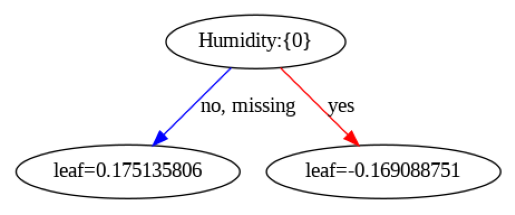

In [ ]:
xgboost.plot_tree(arbol,num_trees=0)

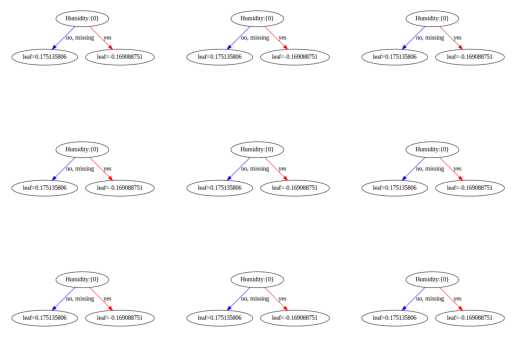

In [ ]:
fig,axs=pyplot.subplots(3,3)
xgboost.plot_tree(arbol,num_trees=0,ax=axs[0,0])
xgboost.plot_tree(arbol,num_trees=0,ax=axs[0,1])
xgboost.plot_tree(arbol,num_trees=0,ax=axs[0,2])
xgboost.plot_tree(arbol,num_trees=0,ax=axs[1,0])
xgboost.plot_tree(arbol,num_trees=0,ax=axs[1,1])
xgboost.plot_tree(arbol,num_trees=0,ax=axs[1,2])
xgboost.plot_tree(arbol,num_trees=0,ax=axs[2,0])
xgboost.plot_tree(arbol,num_trees=0,ax=axs[2,1])
xgboost.plot_tree(arbol,num_trees=0,ax=axs[2,2])
pyplot.show()